## Trening agenta Q-learning w środowisku CliffWalking

W tej sekcji tworzymy środowisko **CliffWalking-v0** z biblioteki **Gymnasium**. Następnie implementujemy algorytm **Q-learning**, który pozwala agentowi uczyć się optymalnej polityki poruszania się po planszy.

Parametry treningu:
- Współczynnik uczenia (`alpha`) = 0.1
- Współczynnik dyskontowy (`gamma`) = 0.9
- Początkowe epsilon (`epsilon`) = 1.0 z malejącym współczynnikiem (`epsilon_decay`) = 0.995

Na końcu procesu rysujemy **krzywą uczenia**, która pokazuje, jak zmieniała się suma nagród agenta w kolejnych epizodach.


Trening zakończony!


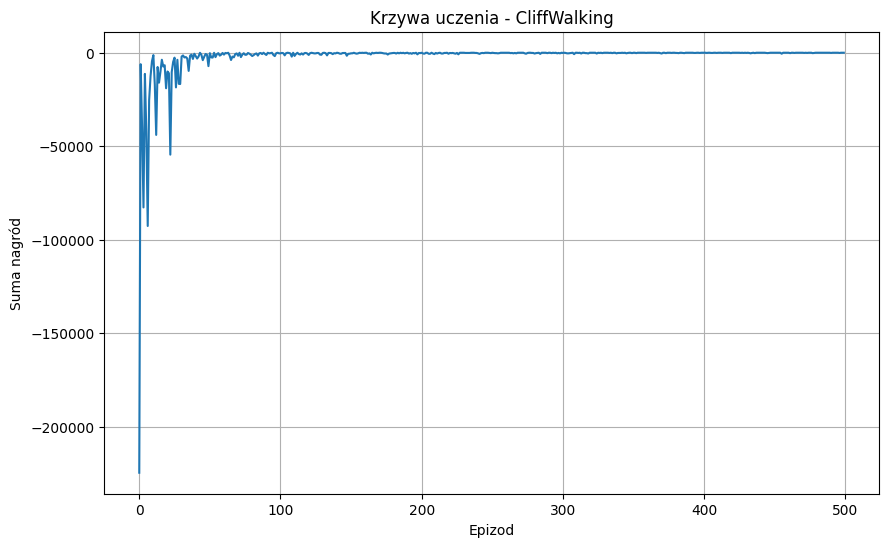

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# Tworzymy środowisko
env = gym.make("CliffWalking-v0")

# Parametry Q-learningu
alpha = 0.1  # współczynnik uczenia się
gamma = 0.9  # współczynnik dyskontowy (zgodnie z wymaganiami)
epsilon = 1.0  # początkowe epsilon dla eksploracji
min_epsilon = 0.01
epsilon_decay = 0.995

# Tworzymy Q-tablicę (num_states x num_actions)
q_table = np.zeros((env.observation_space.n, env.action_space.n))

# Parametry treningu
num_episodes = 500
reward_per_episode = []

# Główna pętla uczenia
for episode in range(num_episodes):
    state, info = env.reset()
    total_reward = 0
    done = False

    while not done:
        # Wybieramy akcję: eksploracja vs eksploatacja
        if np.random.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        next_state, reward, done, truncated, info = env.step(action)

        # Aktualizacja Q-wartości
        best_next_action = np.argmax(q_table[next_state])
        td_target = reward + gamma * q_table[next_state][best_next_action]
        td_error = td_target - q_table[state][action]
        q_table[state][action] += alpha * td_error

        state = next_state
        total_reward += reward

    # Aktualizacja epsilon (żeby coraz więcej eksploatować)
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    reward_per_episode.append(total_reward)

print("Trening zakończony!")

# Krzywa uczenia
plt.figure(figsize=(10, 6))
plt.plot(reward_per_episode)
plt.xlabel('Epizod')
plt.ylabel('Suma nagród')
plt.title('Krzywa uczenia - CliffWalking')
plt.grid()

# Zapisujemy wykres jako obraz
plt.savefig("krzywa_uczenia_cliffwalking.png")

# Pokazujemy wykres na ekranie
plt.show()

# Zapisujemy Q-tablicę do pliku
np.save("q_table_cliffwalking.npy", q_table)


## Pokazanie najlepszego przejścia na podstawie wytrenowanej Q-tabeli

W tej sekcji wczytujemy wcześniej wytrenowaną **Q-tabelę** i wykorzystujemy ją do przeprowadzenia pojedynczego najlepszego przejścia agenta przez planszę CliffWalking.

Agent w każdym stanie wybiera akcję, która daje największą wartość Q, bez eksploracji. Dzięki temu widzimy efekt wyuczonej strategii.


In [3]:
import gymnasium as gym
import numpy as np
import time

# Zakładamy, że masz już wytrenowaną Q-tabelę.
# Jeśli nie masz pliku, to możesz wczytać gotową tabelę, np.
# q_table = np.load("q_table_cliffwalking.npy")

# Ale dla przykładu tutaj załadujemy pustą i później wczytasz swoją.
q_table = np.load("q_table_cliffwalking.npy")

# Tworzymy środowisko z ładną grafiką
env = gym.make("CliffWalking-v0", render_mode="human")

# RESET: agent zaczyna od początku
state, info = env.reset()
done = False

print("\nRozpoczynamy przejście na podstawie wytrenowanej Q-tabeli!")
time.sleep(2)

while not done:
    # Zawsze wybieramy najlepszą możliwą akcję w danym stanie
    action = np.argmax(q_table[state])

    # Wykonanie akcji
    next_state, reward, done, truncated, info = env.step(action)

    # Przechodzimy do nowego stanu
    state = next_state

    # Dajemy czas na zobaczenie ruchu
    time.sleep(0.5)

print("Agent zakończył przejście!")
env.close()



Rozpoczynamy przejście na podstawie wytrenowanej Q-tabeli!
Agent zakończył przejście!


## Trening agenta i natychmiastowe przejście po nauce

W tej sekcji trenujemy agenta za pomocą algorytmu **Q-learning** w środowisku **CliffWalking-v0**, a następnie od razu po zakończeniu treningu demonstrujemy jedno przejście agenta.

Agent porusza się wykorzystując wyłącznie wyuczoną politykę — w każdym stanie wybiera najlepszą możliwą akcję wynikającą z aktualnej Q-tabeli.


In [4]:
import gymnasium as gym
import numpy as np
import time

# Tworzymy środowisko z graficznym renderowaniem
env = gym.make("CliffWalking-v0", render_mode="human")

# Parametry Q-learningu
alpha = 0.1
gamma = 0.9
epsilon = 1.0
min_epsilon = 0.01
epsilon_decay = 0.995

q_table = np.zeros((env.observation_space.n, env.action_space.n))
num_episodes = 500
reward_per_episode = []

# Trening agenta
for episode in range(num_episodes):
    state, info = env.reset()
    done = False
    total_reward = 0

    while not done:
        if np.random.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        next_state, reward, done, truncated, info = env.step(action)

        best_next_action = np.argmax(q_table[next_state])
        td_target = reward + gamma * q_table[next_state][best_next_action]
        td_error = td_target - q_table[state][action]
        q_table[state][action] += alpha * td_error

        state = next_state
        total_reward += reward

    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    reward_per_episode.append(total_reward)

print("Trening zakończony!")

# --- Wizualizacja najlepszego przejścia po nauce ---
state, info = env.reset()
done = False
time.sleep(2)

while not done:
    action = np.argmax(q_table[state])
    next_state, reward, done, truncated, info = env.step(action)
    state = next_state
    time.sleep(0.5)  # Czas na odświeżenie animacji

print("Agent zakończył przejście!")
env.close()


KeyboardInterrupt: 